We manually did for all 30 files with comapies, removing the last collun in excel, adding another collumn with the label where eveything is 0 and making a consistent stock id for each header extracted from factset. 
Convert the date to the wanted python format
Make the labeling of each news header for 3 desired periods
Save everything to csv file. please don't forget to change the names each time

In [2]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

import pandas as pd
import glob
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 






Always we have to have two datsets, one with the headers which is already pre processed and the other with the historical pirces, which is again pre processed. I will upload all the unmerged files in a .zip at the end of this thesis project. Now we need to look at the price in the histroical prices dataset following each news. 

In [26]:
df1 = pd.read_csv("")
df2 = pd.read_csv("")


In [29]:
df1.rename(columns={'Date/Time': 'Date'}, inplace=True)

df1['Date'] = pd.to_datetime(df1['Date']) 

#df1['Date'] = df1['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))





In [30]:
df2['Date'] = pd.to_datetime(df2['Date'])
df1['Label'] = 0 
df1.head()


,Date,Stock,Headline,Label
0,2023-12-27,7269-JP,Suzuki Motor November global vehicle productio...,0
1,2023-12-13,7269-JP,Suzuki Motor to conduct 1-for-4 stock split (¥...,0
2,2023-03-12,7269-JP,StreetAccount Review - Japan Automotive and Au...,0
3,2023-11-29,7269-JP,Suzuki Motor reports October global vehicle pr...,0
4,2023-11-21,7269-JP,Toshiba shareholders approve share consolidati...,0


All seems good now we need to start labeling. We do this by looking at the the csv file with the prices which is already cleanded and we look if he next day is increased or not. Label as 1 or 0. 

In [31]:
#please run this for making the csv files in the right format by labeling them in this case for 1 day 

for index, row in df1.iterrows():
    temp = row['Date']
    nextt = temp + pd.Timedelta(days=1)

    if temp in df2['Date'].values and nextt in df2['Date'].values:

        current_price = df2[df2['Date'] == temp]['Price'].iloc[0]
        next_day_price = df2[df2['Date'] == nextt]['Price'].iloc[0]


        df1.at[index, 'Label'] = 1 if next_day_price > current_price else 0
#label with 1 if the price of the next day increased and 0 if not


We do same here but we look at the next 3 days and we average the results in that 3 days. The trend which ocuured 2 times wins so that is the final label. 

In [37]:
#please run this for making the csv files in the right format by labeling them in this case for 3 days

for index, row in df1.iterrows():
    temp = row['Date']
    price_change = []  


    for i in range(1, 4):
        nextt = temp + pd.Timedelta(days=i)
        if nextt in df2['Date'].values:
         
            if current_date in df2['Date'].values:
                current_price = df2[df2['Date'] == current_date]['Price'].iloc[0]
                next_day_price = df2[df2['Date'] == nextt]['Price'].iloc[0]
                price_change.append(1 if next_day_price > current_price else 0)

    #we need the sum of all labels from the vector to be 2 or more
    if price_change:
        df1.at[index, 'Label'] = 1 if sum(price_change) > len(price_change) / 2 else 0

We do the same here exactly the same but with 5 days. the trend which occured 3 times is the final label. 

In [35]:
#please run this for making the csv files in the right format by labeling them in this case for 5 days 

for index, row in df1.iterrows():
    temp = row['Date']
    price_change = [] 


    for i in range(1, 6):
        nextt = temp + pd.Timedelta(days=i)
        if next_day in df2['Date'].values and temp in df2['Date'].values:
            current_price = df2[df2['Date'] == temp]['Price'].iloc[0]
            next_day_price = df2[df2['Date'] == nextt]['Price'].iloc[0]
            price_change.append(1 if next_day_price > current_price else 0)

    #we need the sum of all labels from the vector to be 3 or more
    if price_change:
        df1.at[index, 'Label'] = 1 if sum(price_change) > len(price_change) / 2 else 0

In [9]:
df1.head()

,Date,Stock,Headline,Label
0,2024-11-01,9868-HK,StreetAccount Summary: The Economist print edi...,0
1,2024-01-01,9868-HK,"XPeng delivers 20,115 vehicles in December, +7...",0
2,2023-12-21,9868-HK,Taobao China completes sale of 25M ADSs in XPe...,0
3,2023-12-21,9868-HK,Follow-up: US considering raising tariffs on C...,0
4,2023-12-20,9868-HK,XPeng to stop releasing new G3 vehicle models ...,0


 Save the csv file after each version was modified. Run the desired period and then save the csv file. 

In [36]:
df1.to_csv("7269-JP_5.csv", index=False)

Now that we created each csv file in the desired way we want, we can start merging all 30 companies. We will sort the merging based on the Date collumn and every news header will have the label and the Stock Id. We will have to do this 3 times, for each of the 3 dataserts that we will build. 

In [3]:
import pandas as pd
import glob
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 

In [11]:
path = '/Users/alex_fr/Downloads/News_5day'  
all_files = glob.glob(path + "/*.csv")


In [8]:
datas = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    datas.append(df)


combined_df = pd.concat(dfs, axis=0, ignore_index=True)
combined_df = combined_df.sort_values('Date')
combined_df.to_csv("combined_5.csv", index=False)

NameError: name 'dfs' is not defined

Now that we have our final datasets we can start loading one here and do the work. For good understading, we will first look at patterns in our data. 


!!!Start running the code from here!!!

datasets are already done


In [8]:
#NO NEED TO RUN ANY PREVIOUS CELLS EXCEPT 0F IMPORTS. HERE BASICALLY THE CODE STARTS


import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

import pandas as pd
import glob
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 



final_data_1 = pd.read_csv('Final_Data/final_data_test.csv')

final_data_1.head(10)

,Date,Stock,Headline,Label
0,2024-05-11,F-US,F: Forensic Stock Earnings & Valuation (New Co...,1
1,2024-05-06,F-US,DJ UPDATE/Pkw-Markt trotz Wachstum im April un...,0
2,2024-05-06,F-US,DJ Pkw-Neuzulassungen steigen im April um knap...,0
3,2024-05-02,F-US,Citigroup Adjusts Price Target on Ford Motor t...,0
4,2024-05-02,F-US,Ford Motor reports April US sales (2.4%) unadj...,0
5,2024-05-02,F-US,Optimized Entry and Exit Levels for F 5124 (St...,0
6,2024-05-01,F-US,Is the Detroit 3's 'mojo' back? Mixed first-qu...,1
7,2024-04-30,F-US,DJ Europäischer Lkw-Markt mit schwachem 1. Qua...,1
8,2024-04-30,F-US,"Headline: DJ Acea: Lkw-Neuzulassungen über 3,5...",1
9,2024-04-30,F-US,Headline: DJ Acea: Van-Neuzulassungen EU/EFTA/...,1


Now let's look at the timeframe of our news and see the number of headers realeased on each year. We see our data starts from 2004 and it should include data untill the beggining of 2024, the date when I downloaded the reports and news from FactSet.

My assumption will be here that most of the data will be from the lastest years, as we have a lot opf new companies and also taking into account the evolution of internet. 

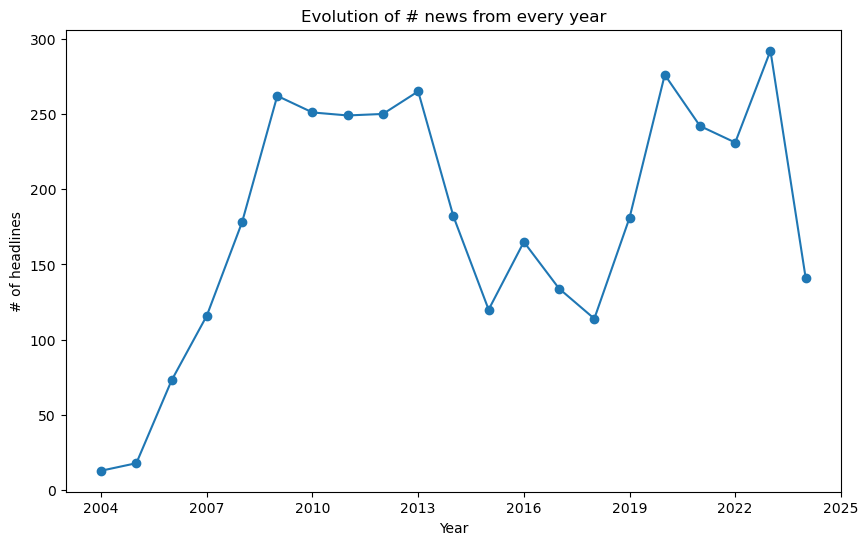

Number of data entries: 3753


In [9]:
final_data_1['Date'] = pd.to_datetime(final_data_1['Date'], format='%Y-%m-%d')

final_data_1['Year'] = final_data_1['Date'].dt.year
headline_per_year = final_data_1['Year'].value_counts().sort_index()


#fill the missing with vw. there is problem there I manually checked and vw is missing from there


final_data_1['Stock'] = final_data_1['Stock'].fillna('VOW3-DE')


plt.figure(figsize=(10, 6))
plt.plot(headline_per_year.index, headline_per_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('# of headlines')
plt.title('Evolution of # news from every year')

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()


num_entries = len(final_data_1)
print(f"Number of data entries: {num_entries}")

We see indeed that the initial hypothesis holds and the number of news starts to raise exponentially from 2014. it peaks in 2023 and then drastically decreases in 2024 as for this year only a few news were extracted. This work has been done in the beggining of 2024. 


It will be interesting to find out how big are the individual datasets for each company from the list. We can check this by looking at the distribution of the Stock id in our final dataset.

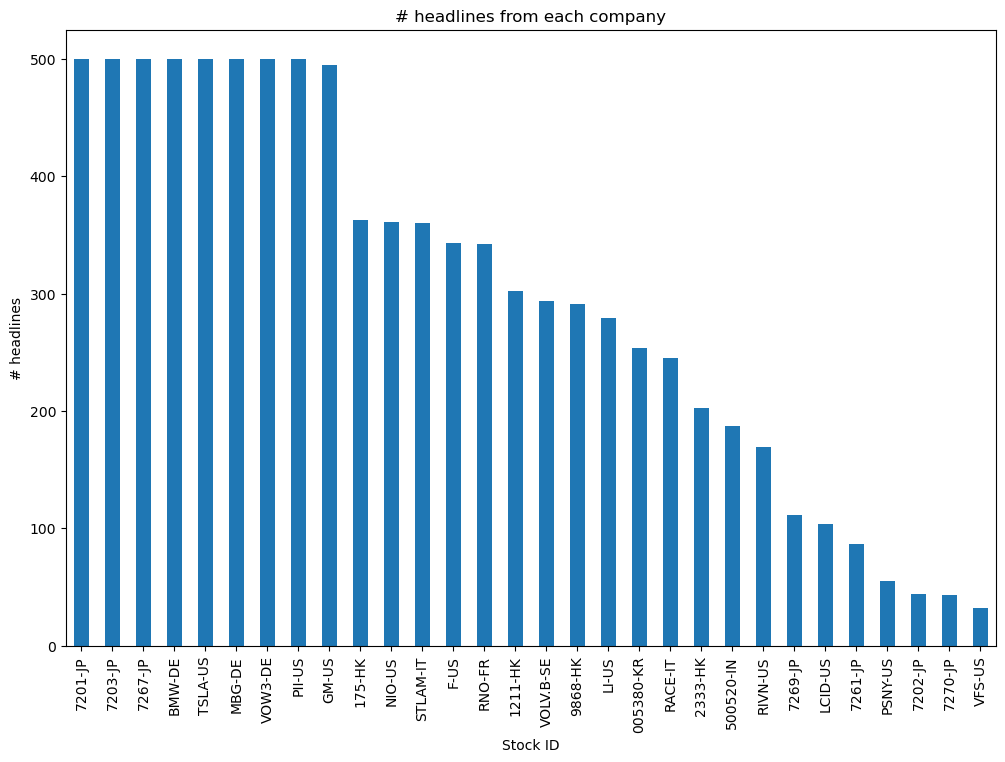

In [6]:
stock_counts = final_data_1['Stock'].value_counts()


plt.figure(figsize=(12, 8))
stock_counts.plot(kind='bar')
plt.xlabel('Stock ID')
plt.ylabel('# headlines')
plt.title('# headlines from each company')
plt.show()

We see that Toyota, BMW or Ford tend to include way mnore data than newr companies on the market such as Rivian. 
It would be intersting to see the correlance between the age pof the companies and their number of news. This can conclude a reaserch question for later in this work. 

Now, let's look at the number of characters in each sentence to see how long our headers are. If will be too much, we might have to start removing stop words for example. 

<Axes: >

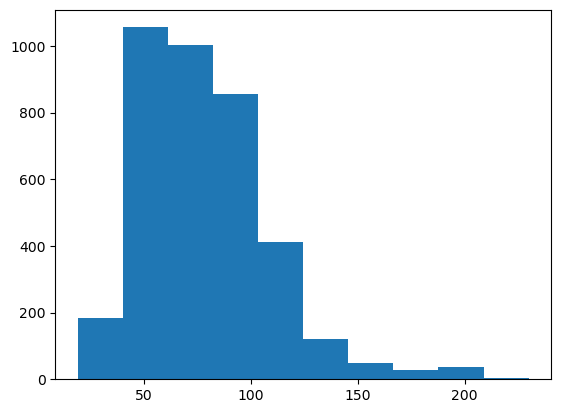

In [7]:
final_data_1['Headline'].str.len().hist(grid=False)


We see that most of our headlines have around 100-150 characters. This looks very similar with a normal distribution, which is a good sign. We don't really have much outliers in terms of strings length. Now let's look at stop words and see which are the most common of them. Some sections of the code and plots for this are took from https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools 

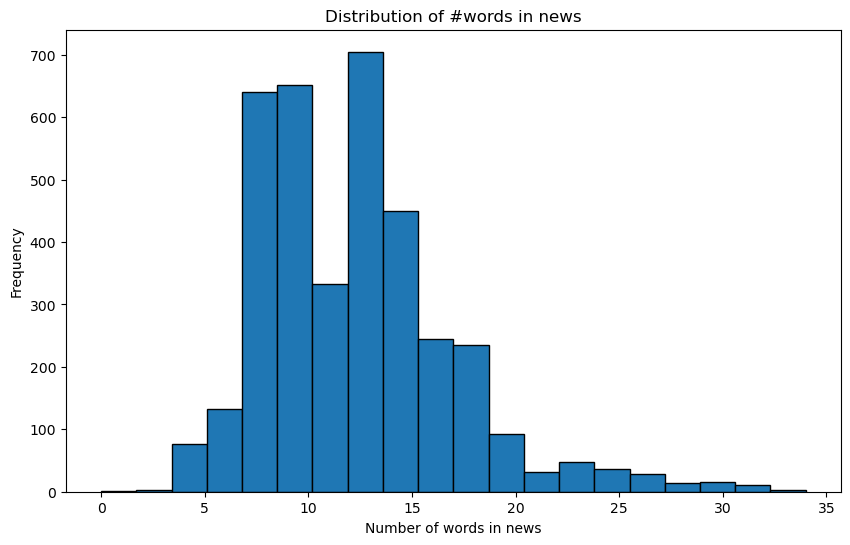

In [8]:
#we looked at the distribution of number of characters from the news, now let's look at the distribution of number of words


#THIS IS VERY IMPORTANT!!!
#if you use the 3 main datasets please comment this line if you use the testing dataset please UNCOMMENT IT!!!!!
final_data_1['Headline'] = final_data_1['Headline'].fillna('')
#because the F-US dataset has a very small number of missing values
#very important


word_counts = final_data_1['Headline'].str.split().apply(len)


plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=20, edgecolor='k')
plt.xlabel('Number of words in news')
plt.ylabel('Frequency')
plt.title('Distribution of #words in news')
plt.show()

We again have a normal distribution which seems good. There are a few outliers as in the istribution of the #characters, on the right tail of the graph, but it will not affect the predictions I believe.

In [9]:
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alex_fr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<BarContainer object of 10 artists>

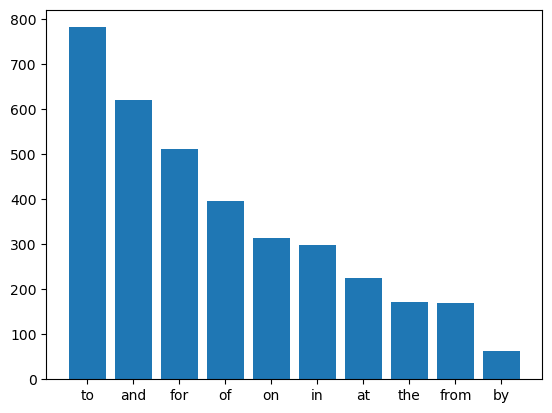

In [10]:
corpus=[]
new = final_data_1['Headline'].str.split()
new =new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
        
top_stop = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y = zip(*top_stop)
plt.bar(x,y)





We see the list with the top 10 stop words apperances from our dataset. As we are working with a finalncial dataset, it might be not needed to remove them. We will see this later, by testing. For now we will keep them and we will create a method to later remove them so we can properly test. 

<Axes: >

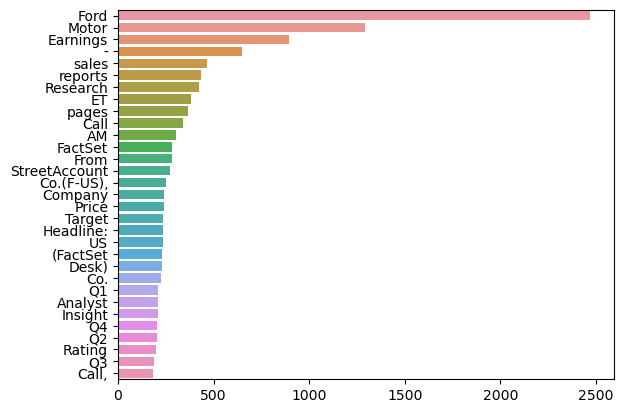

In [11]:
counter = Counter(corpus) 
most = counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

 We see that some of the words are not appearing in the plot. This might be due to their form or including special characters that we are not able to read. For this reason, we might have to remove those ones later. Let's visualize the words also with a WordCloud. 
!!Please remove the comment from the pip install in. order to import on your computer!!

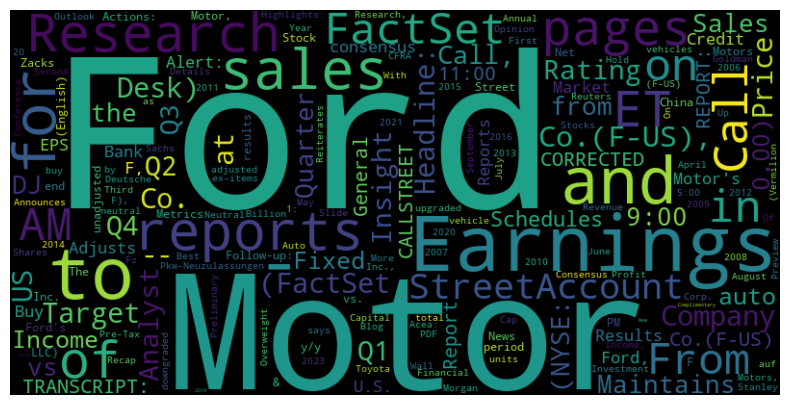

In [12]:
#!pip install wordcloud
from wordcloud import WordCloud


wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(counter)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Now let's analyse the top aperasing n-grams in our headlines with news. We will make a function for this and then check the bi grams, tri grams and four grams. We looked at the number of words already so I assume a number of 4 grams will be enough, as the number of words from the headers is not that much (around 12 in average)

In [13]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter


def get_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]


<Axes: >

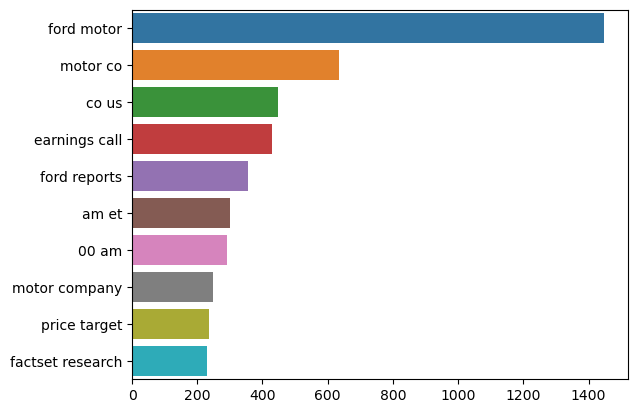

In [14]:
#lets look at the bi grams from our headers 
bi_grams=get_ngram(final_data_1['Headline'],n=2)
x , y=map(list,zip(*bi_grams))
sns.barplot(x=y,y=x)


<Axes: >

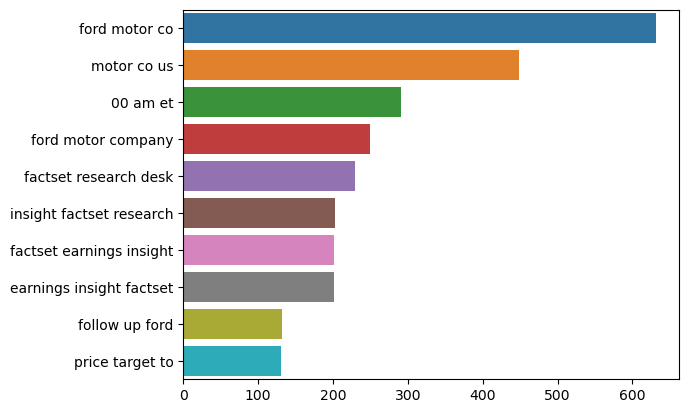

In [15]:
tri_grams=get_ngram(final_data_1['Headline'],n=3)
x , y=map(list,zip(*tri_grams))
sns.barplot(x=y,y=x)


<Axes: >

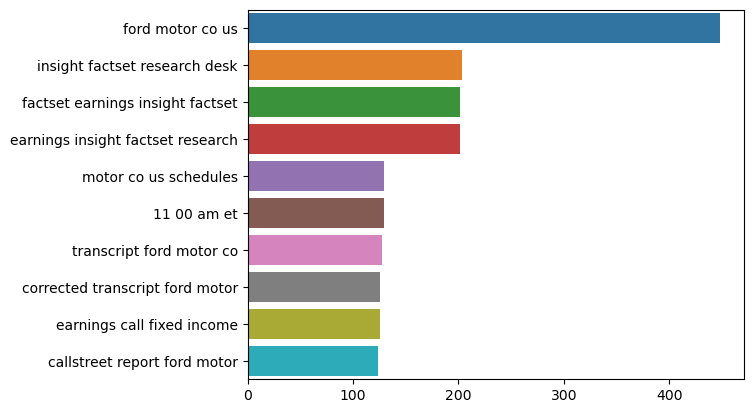

In [16]:
four_grams=get_ngram(final_data_1['Headline'],n=4)
x , y=map(list,zip(*four_grams))
sns.barplot(x=y,y=x)

now let's remove the stopwords from our headers. 

In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_sentence)


#maybe this is not necesarry (for testing purposes)
#this can be skipped if wanted no ifnluence on the rest


In [18]:
import nltk
nltk.download('punkt')

final_data_1['Headline'] = final_data_1['Headline'].str.lower()

final_data_1['Headline'] = final_data_1['Headline'].apply(remove_stop_words)

final_data_1.head()

#maybe this is not necesarry (for testing purposes)



[nltk_data] Downloading package punkt to /Users/alex_fr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Date,Stock,Headline,Label,Year
0,2024-05-11,F-US,f : forensic stock earnings & valuation ( new ...,1,2024
1,2024-05-06,F-US,dj update/pkw-markt trotz wachstum im april un...,0,2024
2,2024-05-06,F-US,dj pkw-neuzulassungen steigen im april um knap...,0,2024
3,2024-05-02,F-US,citigroup adjusts price target ford motor $ 18...,0,2024
4,2024-05-02,F-US,ford motor reports april us sales ( 2.4 % ) un...,0,2024


Before implement any models and fine tunning them, it is important to understand more our data. This is an important step here because it will be different for all 3 of the datasets. I want here to look at our labelings and see the distribution of positive or negative effects after the news were released. This will be impoarnt for undesrtading the differencesw between the datasets and will also providde us some insights on precision and recall later when we make our evalution. 
My initital hypothesis is that way more news are labeles as negative, at least by looking at the price one day after it was relased. In the report we will compare this between all 3 datsets. 


1    2239
0    1514
Name: Label, dtype: int64


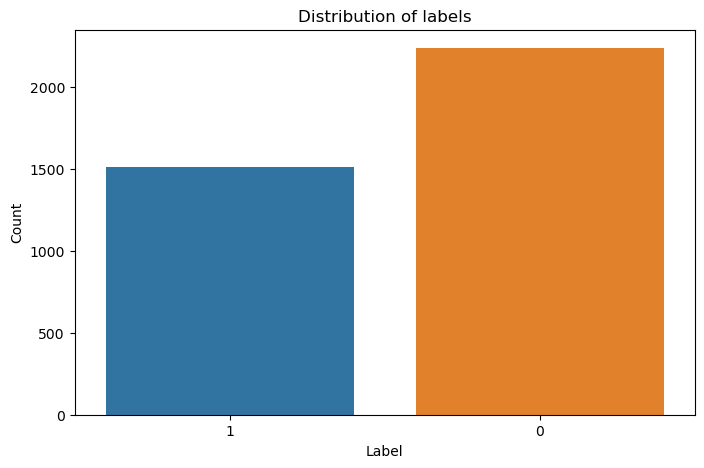

In [19]:
label_count = final_data_1['Label'].value_counts()


print(label_count)

plt.figure(figsize=(8, 5))
sns.barplot(x=label_count.index, y=label_count.values)
plt.title('Distribution of labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(range(len(label_count)), label_count.index) 
plt.show()

We see indeed that way more many news have the label 0. This might bias the model in giving more false negatives later in the evaluation part. The labeleing data is inbalanced for sure and this might affect the precision of our model. 

In [20]:
# !!please uncomment and run this on your machine to install the transformers librabry!!

#!pip install transformers torch
from keras.preprocessing.sequence import pad_sequences
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
import torch
from sklearn.model_selection import KFold
from collections import defaultdict
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import time
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

Now we need to tokenize the texts to make it suitable for bert models. In report can be found what this does mean. 
Code for this was found on the BERT documentation from hugging face and adapted. (https://colab.research.google.com/github/abhimishra91/transformers-tutorials/blob/master/transformers_multi_label_classification.ipynb#scrollTo=DegHNyIEQxB2)
After we tokenize we have to convert each token into BERT ID's. As some of our sentences will be longer and pther shorter, BERT works with pannding making them the equal size. It is basic to work with a base size of 128 tokerns. 
Then we create attention masks for the bert model to differentiateb between the actual headlines and the paddings. This is also standard in using BERT models. Then we have to make our labels usable for pytorch. Again something standar, from documentation. 
Then with tensor we combine the actual texts, paddings and pyetorched labels togehter. This prepares everything for prediction. Srtandard code from same source. 


In [30]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenized_text = [tokenizer.tokenize(sent) for sent in final_data_1['Headline']]
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_text]


input_ids = torch.tensor(pad_sequences(input_ids, maxlen=128, dtype="long", truncating="post", padding="post"))


attention_masks = torch.tensor([[float(i > 0) for i in seq] for seq in input_ids]) #padding is made with 0 


labels = torch.tensor(final_data_1['Label'].values)

train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, random_state=42, test_size=0.1)
train_masks, validation_masks = train_test_split(attention_masks, random_state=42, test_size=0.1)[:2] #change!


train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data) #for making the data random. this should help with overfitting
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=62)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data) 
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=62)

#maybe we come back here later and play with the batch size to see if it improves the results. we keep it standard for now


In [22]:
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",  
    num_labels=2,  
    output_attentions=False, 
    output_hidden_states=False,  
)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

#here to test with!!!
#3e-1 good 
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)


#maybe to modify later 
epochs = 4
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

for epoch_i in range(0, epochs):
    print('\n======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))


    total_loss = 0
    model.train()

    for step, batch in enumerate(train_dataloader):

        if step % 10 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch[0], batch[1], batch[2]

        model.zero_grad()

        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)

        loss = outputs.loss
        total_loss = total_loss + loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

    avg_train_loss = total_loss / len(train_dataloader)
    print("train loss: {0:.2f}".format(avg_train_loss))

print("done")



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/alex_fr/anaconda3/lib/python3.11/site-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



======== Epoch 1 / 9 ========
Training...
  Batch    10  of     55.
  Batch    20  of     55.
  Batch    30  of     55.
  Batch    40  of     55.
  Batch    50  of     55.
train loss: 0.67

======== Epoch 2 / 9 ========
Training...
  Batch    10  of     55.
  Batch    20  of     55.
  Batch    30  of     55.
  Batch    40  of     55.
  Batch    50  of     55.
train loss: 0.65

======== Epoch 3 / 9 ========
Training...
  Batch    10  of     55.
  Batch    20  of     55.
  Batch    30  of     55.
  Batch    40  of     55.
  Batch    50  of     55.
train loss: 0.65

======== Epoch 4 / 9 ========
Training...
  Batch    10  of     55.
  Batch    20  of     55.
  Batch    30  of     55.
  Batch    40  of     55.
  Batch    50  of     55.
train loss: 0.63

======== Epoch 5 / 9 ========
Training...
  Batch    10  of     55.
  Batch    20  of     55.
  Batch    30  of     55.
  Batch    40  of     55.
  Batch    50  of     55.
train loss: 0.60

======== Epoch 6 / 9 ========
Training...
  Batch

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
copy=[]


def evaluate_model(dataloader, model):
    model.eval()  
    predictions, true_labels, scores = [], [], []

    for batch in tqdm(dataloader, desc="Evaluating"):
        batch = tuple(t.to(device) for t in batch)  
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1]}

        with torch.no_grad():
            outputs = model(**inputs)

        logits = outputs[0]
        logits = logits.detach().cpu().numpy()
        label_ids = batch[2].to('cpu').numpy()

        predictions.extend(np.argmax(logits, axis=1))
        true_labels.extend(label_ids)
        scores.extend(logits[:, 1]) 

    accuracy = accuracy_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions, average='weighted')
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    auc = roc_auc_score(true_labels, scores)
   

    return accuracy, f1, precision, recall, auc, true_labels


model = model.to(device)


test_accuracy, test_f1, test_precision, test_recall, test_auc, true_labels = evaluate_model(validation_dataloader, model)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test AUC: {test_auc:.4f}")



#here we do the experiment simualtin the real trading account as presented in the study from report
#we start with 1000 to make the comparison valid and we use a size of 0.2% from ther total account for trasanztions
#we just need the correcxtly predicted news
initial_balance = 1000
current_balance = initial_balance
correct_predictions = predictions == true_labels

for correct in correct_predictions:
    if correct:
        current_balance = current_balance * 1.002
    else:
        current_balance =current_balance * 0.998

print(f"Final account balance: {current_balance:.2f} USD")

#we will use this code for all three models (however just the fine tuned versions)

Evaluating: 100%|█████████████████████████████████| 7/7 [00:11<00:00,  1.62s/it]

Test Accuracy: 0.5851
Test F1 Score: 0.5825
Test Precision: 0.5807
Test Recall: 0.5851
Test AUC: 0.5964


In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(true_labels, scores)
roc_auc = auc(fpr, tpr)  

plt.figure()

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve for BERT (Fine-Tuned)')
plt.legend(loc="lower right")
plt.show()

NameError: name 'scores' is not defined

BERT can be used directly for classification tasks by utilizing its last layer output for the [CLS] token, which is intended for classification purposes. In many pre-trained BERT models for sequence classification, such as BertForSequenceClassification, there's already a classification layer on top of the BERT architecture specifically for this purpose.

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating: 100%|███████████████████████████████| 18/18 [00:23<00:00,  1.32s/it]

Test Accuracy: 0.5699
Test Precision: 0.5238
Test Recall: 0.5699
Test F1 Score: 0.5175
Test AUC: 0.4903


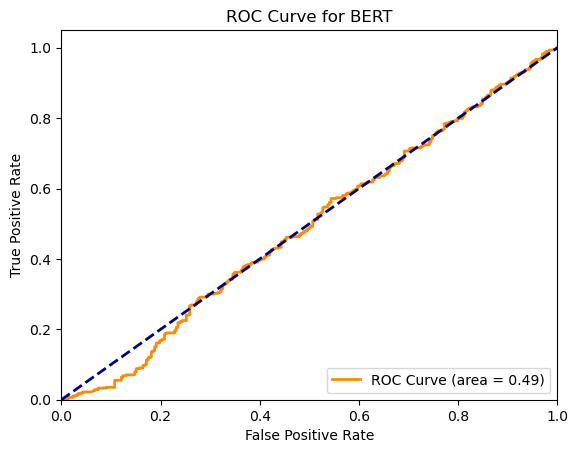

In [119]:
from transformers import BertModel, BertTokenizer
from scipy.special import softmax


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


tokenized_text = [tokenizer.tokenize(sent) for sent in final_data_1['Headline']]
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_text]
input_ids = pad_sequences(input_ids, maxlen=128, dtype="long", truncating="post", padding="post")

attention_masks = [[float(i > 0) for i in seq] for seq in input_ids]


inputs = torch.tensor(input_ids)
masks = torch.tensor(attention_masks)
labels = torch.tensor(final_data_1['Label'].values)


train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(inputs, labels, random_state=42, test_size=0.2)
train_masks, validation_masks = train_test_split(masks, random_state=42, test_size=0.2)
#to change for experiment. 
#also for account simulation make sure to use 10% for testing

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=42)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=42)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


def evaluate_model(dataloader, model):
    model.eval()  
    predictions, true_labels, scores = [], [], []

    for batch in tqdm(dataloader, desc="Evaluating"):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch[0], batch[1], batch[2]

        with torch.no_grad():
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

        logits = outputs.logits
        probs = softmax(logits.detach().cpu().numpy(), axis=1)
        score = probs[:, 1]  
        scores.extend(score)
        predictions.extend(np.argmax(logits.detach().cpu().numpy(), axis=1))
        true_labels.extend(b_labels.to('cpu').numpy())
        
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')
    test_auc = roc_auc_score(true_labels, scores)  

    return accuracy, precision, recall, f1, scores, true_labels, test_auc

accuracy, precision, recall, f1, scores, true_labels, test_auc = evaluate_model(validation_dataloader, model)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print(f"Test AUC: {test_auc:.4f}")


#here we do the experiment simualtin the real trading account as presented in the study from report
#we start with 1000 to make the comparison valid and we use a size of 0.2% from ther total account for trasanztions
#we just need the correcxtly predicted news
initial_balance = 1000
current_balance = initial_balance
correct_predictions = predictions == true_labels

for correct in correct_predictions:
    if correct:
        current_balance = current_balance * 1.002
    else:
        current_balance =current_balance * 0.998

print(f"Final account balance: {current_balance:.2f} USD")

#we will use this code for all three models (however just the fine tuned versions)


#roc curve now copy this to every roc curve 
fpr, tpr, thresholds = roc_curve(true_labels, scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve for BERT')
plt.legend(loc="lower right")
plt.show()



FinBERT model now. same evualtion 

This is a finbert model without pre training it on my dataset. 


In [28]:
#each model cell is ok to be runned separately as we always split the data amd define the tokenizer and attention maks etc

import torch
from torch.utils.data import TensorDataset, DataLoader, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tqdm import tqdm
import numpy as np



tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

tokenized_text = [tokenizer.tokenize(sent) for sent in final_data_1['Headline']]
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_text]


input_ids = torch.tensor(pad_sequences(input_ids, maxlen=128, dtype="long", truncating="post", padding="post"))


attention_masks = torch.tensor([[float(i > 0) for i in seq] for seq in input_ids])


labels = torch.tensor(final_data_1['Label'].values)

#to experiment here with later 
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, random_state=42, test_size=0.2)
train_masks, validation_masks = train_test_split(attention_masks, random_state=42, test_size=0.2)


validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=62)

model = BertForSequenceClassification.from_pretrained(
    'yiyanghkust/finbert-tone',
    num_labels=2,  
    output_attentions=False,
    output_hidden_states=False,
    ignore_mismatched_sizes=True,  
)


model.classifier = torch.nn.Linear(model.classifier.in_features, 2)  
model.num_labels = 2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at yiyanghkust/finbert-tone and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30873, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

Evaluating: 100%|███████████████████████████████| 19/19 [00:33<00:00,  1.74s/it]

Test Accuracy: 0.4236
Test F1 Score: 0.3380
Test Precision: 0.5051
Test Recall: 0.4236
Test AUC: 0.5121


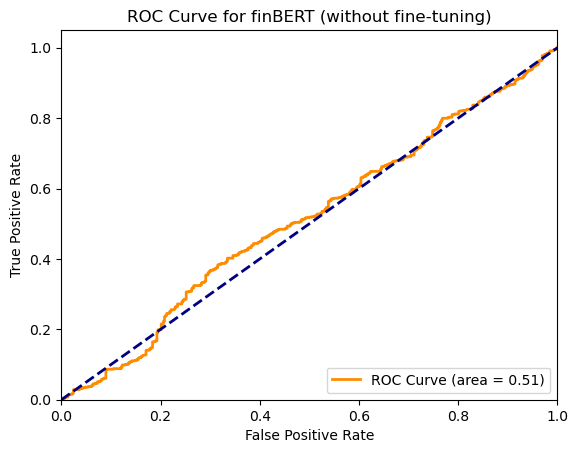

In [29]:
#same evaluation function as for bert fine tuned version 
def evaluate_model(dataloader, model):
    model.eval()  
    predictions, true_labels, scores = [], [], []

    for batch in tqdm(dataloader, desc="Evaluating"):
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1]}

        with torch.no_grad():
            outputs = model(**inputs)

        logits = outputs[0]
        logits = logits.detach().cpu().numpy()
        label_ids = batch[2].to('cpu').numpy()

        predictions.extend(np.argmax(logits, axis=1))
        true_labels.extend(label_ids)
        scores.extend(logits[:, 1])  

    accuracy = accuracy_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions, average='weighted')
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    test_auc = roc_auc_score(true_labels, scores)  

    return accuracy, f1, precision, recall, test_auc, true_labels, scores 

test_accuracy, test_f1, test_precision, test_recall, test_auc, true_labels, scores = evaluate_model(validation_dataloader, model)


print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test AUC: {test_auc:.4f}")  


fpr, tpr, thresholds = roc_curve(true_labels, scores)
roc_auc_plot = auc(fpr, tpr)  

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc_plot:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve for finBERT (without fine-tuning)')
plt.legend(loc="lower right")
plt.show()

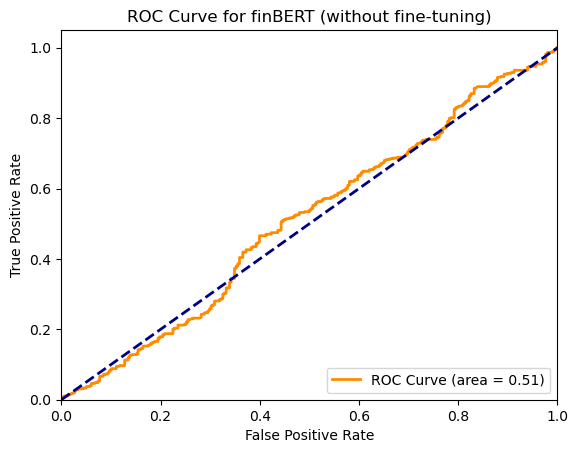

In [122]:
#just copied one more time the AUC plot for better visualization run this cell after any previous model 
fpr, tpr, thresholds = roc_curve(true_labels, scores)
roc_auc_plot = auc(fpr, tpr)  

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc_plot:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve for finBERT (without fine-tuning)')
plt.legend(loc="lower right")
plt.show()

Now we take a fin bert model and we fine tune it on our dataset. we use the same number of baches and 4 epochs in order to be consistent and to make the exerpiments valid. 

In [26]:
fin_bert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone', num_labels=2, output_attentions=False, output_hidden_states=False, ignore_mismatched_sizes=True)
optimizer = AdamW(fin_bert.parameters(), lr=1e-4, eps=1e-8)
#learning rate 1e-4 good 
#modify later here
total_steps = len(train_dataloader) * 2


scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0, 
                                            num_training_steps=total_steps)

#2 epochs now for test 
#good with 5, lr bigger
fin_bert.train()  
#epoches 
for epoch_i in range(0, 2):  
    #print(f'======== Epoch {epoch_i + 1} / 4 ========')
    total_train_loss = 0

    for step, batch in enumerate(train_dataloader):
      
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        fin_bert.zero_grad()        

        outputs = fin_bert(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask, 
                        labels=b_labels)

        loss = outputs.loss
        total_train_loss += loss.item()


        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)


        optimizer.step()
        scheduler.step()


    avg_train_loss = total_train_loss / len(train_dataloader)    
    print(f" train loss: {avg_train_loss:.2f}")

print("done")



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at yiyanghkust/finbert-tone and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/alex_fr/anaconda3/lib/python3.11/site-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


======== Epoch 1 / 6 ========
 train loss: 0.68
======== Epoch 2 / 6 ========
 train loss: 0.66
======== Epoch 3 / 6 ========
 train loss: 0.62
======== Epoch 4 / 6 ========
 train loss: 0.54
======== Epoch 5 / 6 ========
 train loss: 0.39
======== Epoch 6 / 6 ========
 train loss: 0.23
done


Evaluating: 100%|█████████████████████████████████| 7/7 [00:11<00:00,  1.60s/it]


Test Accuracy: 0.4814
Test F1 Score: 0.4826
Test Precision: 0.5174
Test Recall: 0.4814
Test AUC: 0.4971


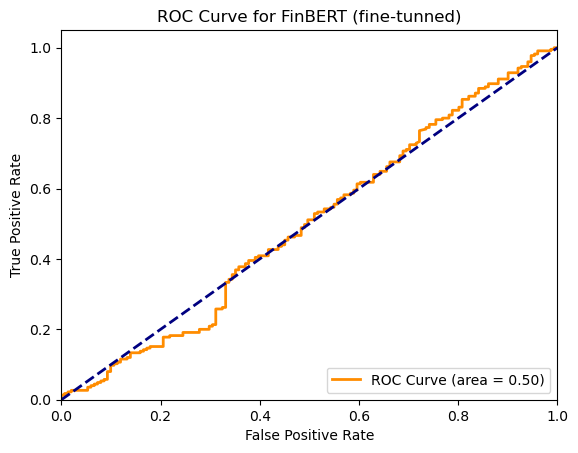

In [27]:
def evaluate_model(dataloader, model):
    model.eval() 
    predictions, true_labels, scores = [], [], []

    for batch in tqdm(dataloader, desc="Evaluating"):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = model(b_input_ids, attention_mask=b_input_mask)

        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        predictions.extend(np.argmax(logits, axis=1))
        true_labels.extend(label_ids)

       
        probs = torch.nn.functional.softmax(torch.tensor(logits), dim=1).numpy()
        scores.extend(probs[:, 1])

    accuracy = accuracy_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions, average='weighted')
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    auc_score = roc_auc_score(true_labels, scores)

    return accuracy, f1, precision, recall, auc_score, scores, true_labels



test_accuracy, test_f1, test_precision, test_recall, test_auc, scores, true_labels = evaluate_model(validation_dataloader, fin_bert)


print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test AUC: {test_auc:.4f}")


#here we do the experiment simualtin the real trading account as presented in the study from report
#we start with 1000 to make the comparison valid and we use a size of 0.2% from ther total account for trasanztions
#we just need the correcxtly predicted news
initial_balance = 1000
current_balance = initial_balance
correct_predictions = predictions == true_labels

for correct in correct_predictions:
    if correct:
        current_balance = current_balance * 1.002
    else:
        current_balance =current_balance * 0.998

print(f"Final account balance: {current_balance:.2f} USD")

#we will use this code for all three models (however just the fine tuned versions)


fpr, tpr, thresholds = roc_curve(true_labels, scores)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('ROC Curve for FinBERT (fine-tunned)')
plt.legend(loc="lower right")
plt.show()




In [ ]:
initial_balance = 1000 
current_balance = initial_balance
correct_predictions = np.array(predictions) == np.array(true_labels)

for correct in correct_predictions:
    if correct:
        current_balance *= 1.002  
    else:
        current_balance *= 0.998  

print(f"Final account balance: {current_balance:.2f} USD")

roBERTa model now, assumption that is not needed because of the size of the dataset we have which is noty that large. i expect similar results with beert here . 

In [88]:
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from scipy.special import softmax
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
#makesure to set number of labels to two for our task
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  
model.to(device)



tokenized_text = [tokenizer.encode(sent, add_special_tokens=True, max_length=128, truncation=True, padding='max_length') for sent in final_data_1['Headline']]
input_ids = np.array(tokenized_text)
attention_masks = [[float(i > 0) for i in seq] for seq in input_ids]
inputs = torch.tensor(input_ids)
masks = torch.tensor(attention_masks)
labels = torch.tensor(final_data_1['Label'].values)


train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(inputs, labels, random_state=42, test_size=0.2)
train_masks, validation_masks = train_test_split(masks, random_state=42, test_size=0.2)


train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=42)
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=42)

#other loss function?
loss_fn = torch.nn.CrossEntropyLoss()

#2e-1 was good
optimizer = AdamW(model.parameters(), lr=3e-5)


def train_model(train_dataloader, model, loss_fn, optimizer):
    model.train()
    total_loss = 0
    for batch in tqdm(train_dataloader, desc="Training"):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch[0], batch[1], batch[2]
        model.zero_grad()
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        total_loss = total_loss + loss.item()
        loss.backward()
        optimizer.step()
    average_loss = total_loss / len(train_dataloader)
    print(f"Average training loss: {average_loss:.4f}")


def evaluate_model(dataloader, model):
    model.eval()
    predictions, true_labels, scores = [], [], []
    for batch in tqdm(dataloader, desc="Evaluating"):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch[0], batch[1], batch[2]
        with torch.no_grad():
        outputs = model(b_input_ids, attention_mask=b_input_mask)
        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        probs = softmax(logits, axis=1)
        scores.extend(probs[:, 1])
        predictions.extend(np.argmax(logits, axis=1))
        true_labels.extend(label_ids)
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')
    test_auc = roc_auc_score(true_labels, scores)
    return accuracy, precision, recall, f1, test_auc, scores, true_labels

#change later for extepriemtning
epochs = 4
for epoch in range(epochs):
    print(f'Epoch {epoch+1}/{epochs}')
    train_model(train_dataloader, model, loss_fn, optimizer)




Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/alex_fr/anaconda3/lib/python3.11/site-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4


Training: 100%|███████████████████████████████| 197/197 [12:14<00:00,  3.73s/it]


Average training loss: 0.6429
Epoch 2/4


Training: 100%|███████████████████████████████| 197/197 [11:46<00:00,  3.59s/it]


Average training loss: 0.6393
Epoch 3/4


Training: 100%|███████████████████████████████| 197/197 [12:14<00:00,  3.73s/it]


Average training loss: 0.6399
Epoch 4/4


Training: 100%|███████████████████████████████| 197/197 [11:33<00:00,  3.52s/it]

Average training loss: 0.6372


Evaluating: 100%|███████████████████████████████| 85/85 [01:20<00:00,  1.05it/s]

Validation Accuracy: 0.6379
Validation Precision: 0.4069
Validation Recall: 0.6379
Validation F1 Score: 0.4969
Validation AUC: 0.5111



/Users/alex_fr/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


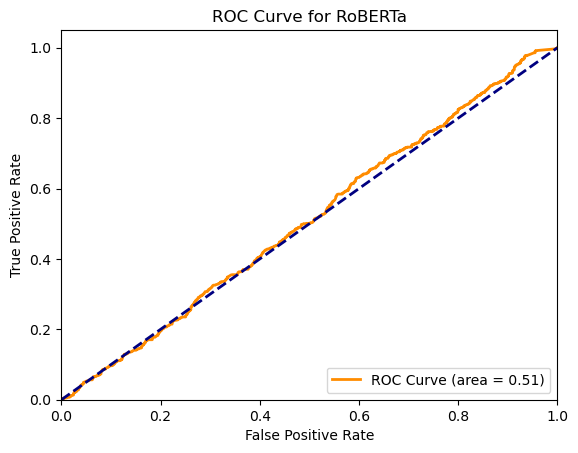

In [90]:
accuracy, precision, recall, f1, test_auc, scores, true_labels = evaluate_model(validation_dataloader, model)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {test_auc:.4f}")


#here we do the experiment simualtin the real trading account as presented in the study from report
#we start with 1000 to make the comparison valid and we use a size of 0.2% from ther total account for trasanztions
#we just need the correcxtly predicted news
initial_balance = 1000
current_balance = initial_balance
correct_predictions = predictions == true_labels

for correct in correct_predictions:
    if correct:
        current_balance = current_balance * 1.002
    else:
        current_balance =current_balance * 0.998

print(f"Final account balance: {current_balance:.2f} USD")

#we will use this code for all three models (however just the fine tuned versions)


fpr, tpr, thresholds = roc_curve(true_labels, scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve for RoBERTa')
plt.legend(loc="lower right")
plt.show()

In [65]:
#in this cell i will just build my testing dataset, the code will be unroganized!
#not part of the experiemtns no need to run this cell anymore

df1 = pd.read_csv("F-US1.csv")


df1 = df1.drop(columns=['Source'])

df1.columns = ['Date', 'Stock', 'Headline']

df1['Stock'] = 'F-US'

df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce').dt.strftime('%Y-%m-%d')





df2 = pd.read_csv("F-US2.csv")

df2.columns = df2.iloc[0]

df2 = df2.drop([0, 1])
df2 = df2.reset_index(drop=True)

df2.columns = df2.columns.astype(str)
df2.columns = ['Date', 'Price'] + list(df2.columns[2:])
df2 = df2[['Date', 'Price']]
#now we make the same date formst
df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce').dt.strftime('%Y-%m-%d')


df2.head()


,Date,Price
0,2004-01-30,14.54
1,2004-02-02,13.95
2,2004-02-03,13.72
3,2004-02-04,13.89
4,2004-02-05,14.15


In [75]:
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])


df2['Price'] = pd.to_numeric(df2['Price'], errors='coerce')


df1['Label'] = None

for index, row in df1.iterrows():
    temp = row['Date']
    nextt = temp + pd.Timedelta(days=1)

    if temp in df2['Date'].values and nextt in df2['Date'].values:
        current = df2[df2['Date'] == temp]['Price'].iloc[0]
        nextd = df2[df2['Date'] == nextt]['Price'].iloc[0]
        df1.at[index, 'Label'] = 1 if nextd > current else 0


df1['Label'] = df1['Label'].fillna(1)


df1.head(20)
#df1.to_csv('final_data_test.csv', index=False)

,Date,Stock,Headline,Label
0,2024-05-11,F-US,F: Forensic Stock Earnings & Valuation (New Co...,1
1,2024-05-06,F-US,DJ UPDATE/Pkw-Markt trotz Wachstum im April un...,1
2,2024-05-06,F-US,DJ Pkw-Neuzulassungen steigen im April um knap...,1
3,2024-05-02,F-US,Citigroup Adjusts Price Target on Ford Motor t...,1
4,2024-05-02,F-US,Ford Motor reports April US sales (2.4%) unadj...,1
5,2024-05-02,F-US,Optimized Entry and Exit Levels for F 5124 (St...,1
6,2024-05-01,F-US,Is the Detroit 3's 'mojo' back? Mixed first-qu...,1
7,2024-04-30,F-US,DJ Europäischer Lkw-Markt mit schwachem 1. Qua...,1
8,2024-04-30,F-US,"Headline: DJ Acea: Lkw-Neuzulassungen über 3,5...",1
9,2024-04-30,F-US,Headline: DJ Acea: Van-Neuzulassungen EU/EFTA/...,1
